NAME: Manish kumar

 # Task #1 - To Explore Supervised Machine Learning 

### PROBLEM STATEMENT: In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.What will be predicted score if a student study for 9.25 hrs in a day?

### DATASET: http://bit.ly/w-data

In [18]:
#import all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
#loading dataset
df = pd.read_csv('http://bit.ly/w-data')
df.head(10)

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25

In [4]:
#checking size of dataset
df.shape

(25, 2)

In [5]:
#checking all column names of dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
#To describe the dataset 
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

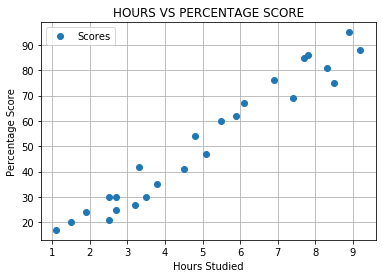

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style ='o')  
plt.title('HOURS VS PERCENTAGE SCORE')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

### Divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### Next step is to split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:


In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [10]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression  
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

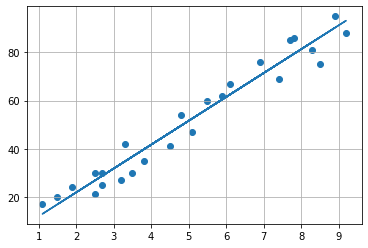

In [11]:
# Plotting the regression line
line = model.coef_*x + model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.grid()
plt.show()

# Making Predictions

In [12]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [13]:
# Comparing Actual vs Predicted
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(pred_data)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


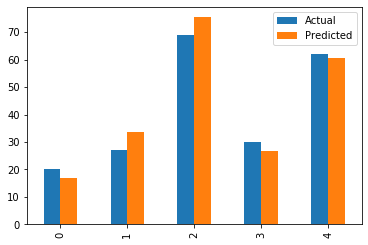

In [14]:
# Plot bar graph for predictive data
data_plot = pred_data.head()
data_plot.plot(kind = "bar")


# Evaluating the model


### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [15]:
print(f'THE TRAIN SCORE; {model.score(x_train,y_train)}')
print(f'THE TEST SCORE; {model.score(x_train,y_train)}')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'MEAN ABSOLUTE ERROR :' ,mean_absolute_error(y_test,y_pred))
print(f'MEAN SQUARED ERROR :' ,mean_squared_error(y_test,y_pred))

THE TRAIN SCORE; 0.9515510725211553
THE TEST SCORE; 0.9515510725211553
MEAN ABSOLUTE ERROR : 4.183859899002975
MEAN SQUARED ERROR : 21.5987693072174


## Evaluating What will be predicted score if a student study for 9.25 hrs in a day?

In [16]:
# Test with your own data
hours = [[9.25]]
pred = model.predict(hours)
print("No of Hours : {}".format(hours))
print("Predicted Score : {}".format(pred))

No of Hours : [[9.25]]
Predicted Score : [93.69173249]
